$$\textbf{Blatt 07 - Praktische Optimierung - Adrian Lentz, Robert}$$

Lösungen und Erklärungen für Blatt 07. $$\newline$$
Adrian Lentz - Matrikelnummer: 258882 $$\newline$$
Robert Schönewald - Matrikelnummer: 188252

$$\textbf{Aufgabe 7.3}$$


In [1]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
import scipy
import statsmodels.api as sm
import statsmodels.distributions.empirical_distribution as edf
from scipy.stats import multivariate_normal

In [2]:
#Funktion definieren
def f(x):                            
    return (x[0]-2)**2 + (x[1]-1)**2
def g1(x):                            #Nebenbedingung 1
    return x[0]**2 - 2*x[0] + x[1]
def g2(x):                            #Nebenbedingung 2
    return -x[0]+x[1]+2

In [3]:
def seqstraf(f,g1,g2,x0,z1,gamma):
    def T(x):
        return f(x)+z1*(np.max([0,g1(x)]) + np.max([0,g2(x)]))
    #x0=scipy.optimize.minimize(f,x0).x
    while g1(x0)>0 or g2(x0)>0:
        x0=scipy.optimize.minimize(T,x0).x
        z1=gamma*z1
    return x0

In [18]:
ergebnisse=[]
zlist={0.1 , 0.2 , 0.3 , 0.4 , 0.5 , 0.6 , 0.7 , 0.8 , 0.9 , 1}
gammalist={1.1 , 1.2 , 1.3 , 1.4 , 1.5 , 1.6 , 1.7 , 1.8 , 1.9 , 2}
for gamma in gammalist:
    for z in zlist:
        x0=seqstraf(f,g1,g2,[0,5],z,gamma)
        ergebnisse.append([x0,f(x0),gamma,z])


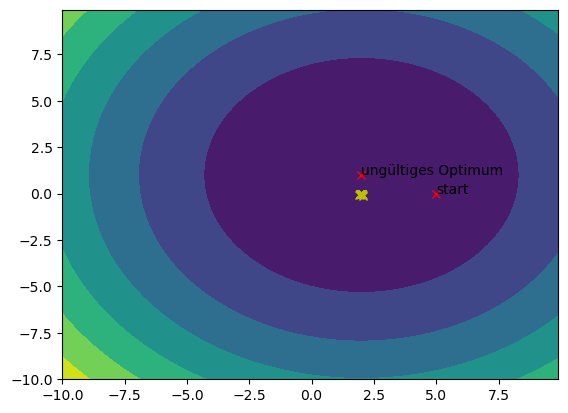

In [19]:
x, y = np.mgrid[-10:10:.1, -10:10:.1]
x0=scipy.optimize.minimize(f,[0,5]).x
pos = [x, y]
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, f(pos))
ax2.text(5,0,"start")
ax2.plot(5,0,"rx")
ax2.text(x0[0],x0[1],"ungültiges Optimum")
ax2.plot(x0[0],x0[1],"rx")
for x in ergebnisse:
    ax2.plot(x[0][0],x[0][1],"yx") 
            

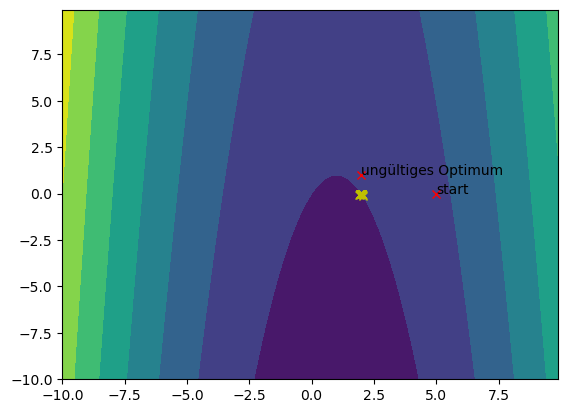

In [20]:
x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = [x, y]
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, g1(pos))
ax2.text(5,0,"start")
ax2.plot(5,0,"rx")
ax2.text(x0[0],x0[1],"ungültiges Optimum")
ax2.plot(x0[0],x0[1],"rx")
for x in ergebnisse:
    ax2.plot(x[0][0],x[0][1],"yx") 
            

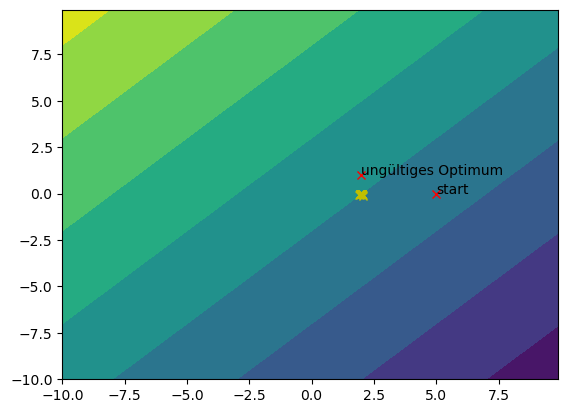

In [21]:
x, y = np.mgrid[-10:10:.1, -10:10:.1]
pos = [x, y]
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(x, y, g2(pos))
ax2.text(5,0,"start")
ax2.plot(5,0,"rx")
ax2.text(x0[0],x0[1],"ungültiges Optimum")
ax2.plot(x0[0],x0[1],"rx")
for x in ergebnisse:
    ax2.plot(x[0][0],x[0][1],"yx") 
            

In [24]:
ergebnisse.sort(key=lambda x: x[1])
ergebnisse

[[array([ 1.99999999e+00, -1.00736977e-08]), 1.0000000201473953, 1.1, 0.4],
 [array([ 1.99999996e+00, -3.53383355e-08]), 1.0000000706766738, 1.1, 0.1],
 [array([ 1.99999976e+00, -2.41409214e-07]), 1.0000004828185438, 1.2, 0.5],
 [array([ 1.99999962e+00, -3.84122652e-07]), 1.0000007682455936, 1.7, 0.2],
 [array([ 1.99999907e+00, -9.28535402e-07]), 1.0000018570725273, 1.1, 0.8],
 [array([ 1.99999872e+00, -1.28502855e-06]), 1.0000025700604092, 1.1, 0.2],
 [array([ 1.99999698e+00, -3.02871753e-06]), 1.0000060574533594, 1.8, 0.8],
 [array([ 1.99999636e+00, -3.64221030e-06]), 1.0000072844471204, 2, 0.9],
 [array([ 1.99999526e+00, -4.74391587e-06]), 1.000009487876683, 1.8, 0.6],
 [array([ 1.99999497e+00, -5.02847625e-06]), 1.0000100570030543, 1.5, 0.2],
 [array([ 1.99999350e+00, -6.50951331e-06]), 1.0000130191113117, 1.4, 0.4],
 [array([ 1.99999146e+00, -8.54345130e-06]), 1.000017087048573, 1.4, 0.2],
 [array([ 1.99998436e+00, -1.56463261e-05]), 1.0000312931415014, 2, 0.8],
 [array([ 1.999976

Man erkennt an der oben sortierten Liste, dass der beste Wert von f der erreicht wird 1.0000000201473953 ist mit gamma=1.1 und zeta=0.4, während die schlechteste Konfiguration gamma=1.7 und zeta=0.4 ist mit einem Wert von 1.3135098785734094. Insbesondere fällt auf, dass beide einen zeta-Wert von 0.4 haben. Zusätzlich sind beinahe alle Werte nah aneinander, wie im Diagramm sichtbar. 

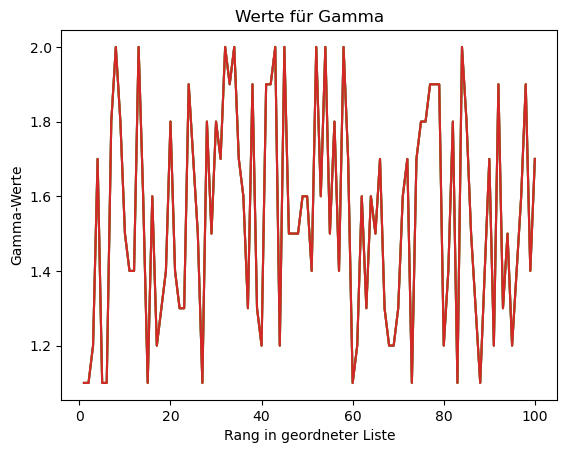

In [35]:
plt.xlabel("Rang in geordneter Liste")
plt.ylabel("Gamma-Werte")
plt.title("Werte für Gamma")
for i in range(len(ergebnisse[0])):
    plt.plot(list(range(1,101)),[pt[2] for pt in ergebnisse])
plt.show()

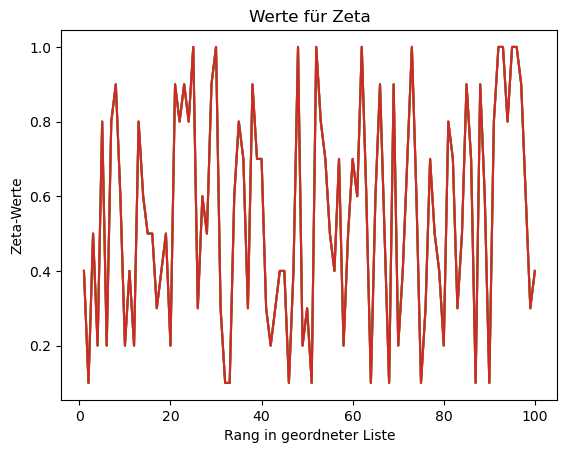

In [34]:
plt.xlabel("Rang in geordneter Liste")
plt.ylabel("Zeta-Werte")
plt.title("Werte für Zeta")
for i in range(len(ergebnisse[0])):
    plt.plot(list(range(1,101)),[pt[3] for pt in ergebnisse])
plt.show()

Hier sieht man noch einmal deutlicher, dass die Parameter kaum eine Auswirkung auf die Qualität der Berechnung haben.